Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

THE BINOMIAL DISTRIBUTION

Use binomial when:
1. Fixed number of trials (n)
2. Each trial has two outcomes (success/failure)
3. Trials are independent
4. Probability of success (p) is constant

Biology Examples:
- Genotyping n plants (success = homozygous recessive)
- Testing n individuals for disease (success = positive)
- Sequencing n DNA bases (success = mutation present)
- n animals surviving treatment (success = survive)

EXAMPLE 1: MENDELIAN GENETICS

Scenario: Cross Aa x Aa, examine 10 offspring
Probability each is aa (recessive): 0.25 

One experiment: Number of aa plants = 2 

1000 experiments simulated:
Mean number of aa plants: 2.48 
Expected mean: n × p = 2.5 

OBSERVATION: Simulation matches theory!

CALCULATING PROBABILITIES

Question 1: What's P(exactly 3 aa plants)?
P(X = 3) = 0.2503 
About 25 % chance

From simulation: 0.253 

Question 2: What's P(at most 2 aa plants)?
P(X = 2) = 0.5256 

From simulation: 0.528 

Question 3: What's P(at least 4 aa plants)?
P(X = 4) = 0

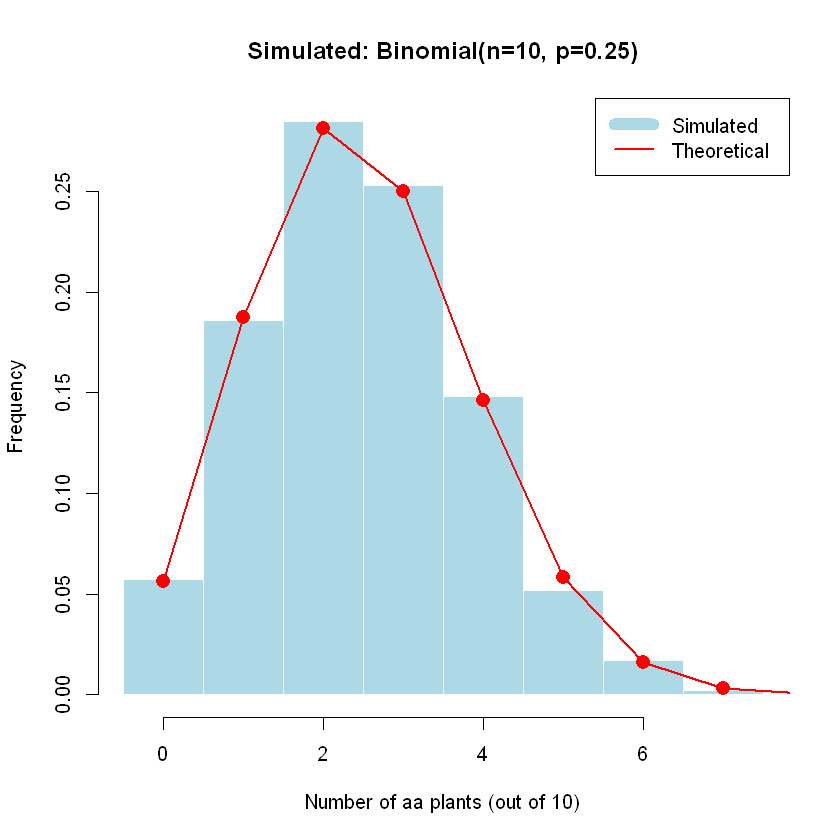

OBSERVATIONS:
1. As n increases, distribution spreads out (more possible values)
2. As n increases, distribution becomes more bell-shaped (normal!)
3. Peak stays at expected value: E[X] = n × p

EFFECT OF SUCCESS PROBABILITY



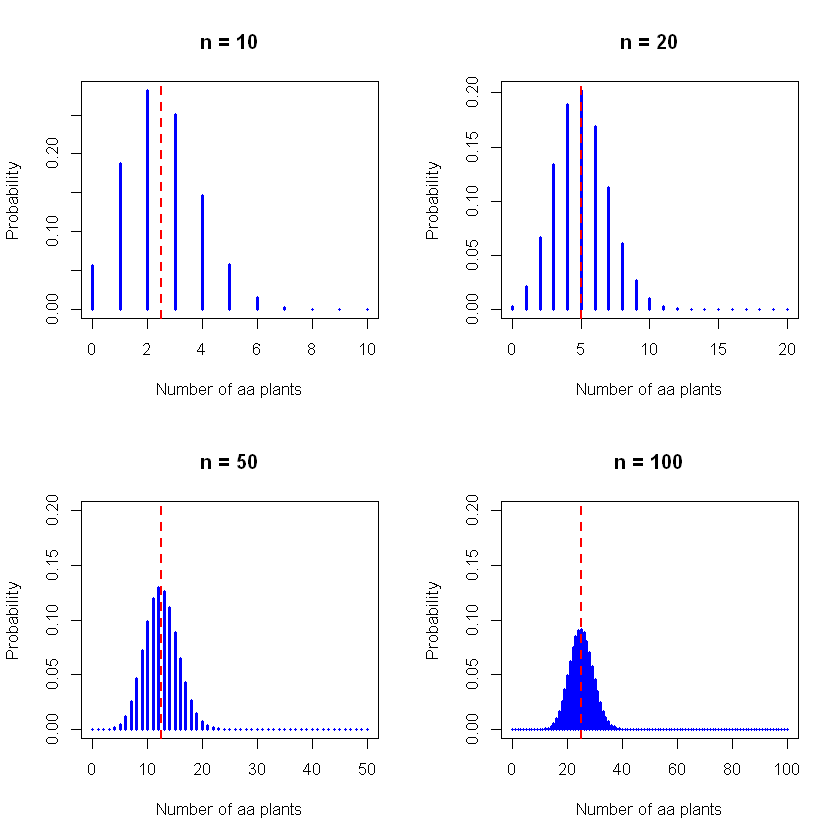

OBSERVATIONS:
1. p = 0.5: Symmetric distribution
2. p < 0.5: Right-skewed (tail to the right)
3. p > 0.5: Left-skewed (tail to the left)
4. Peak moves with p: E[X] = n × p

BIOLOGY APPLICATION: DISEASE SCREENING

Scenario: Screen 50 people for a disease
Disease prevalence: 10 %

Expected number of cases: 5 

P(exactly 5 cases) = 0.1849 

P(0 cases - all healthy) = 0.0052 
Very unlikely (only 0.52 % chance)

P(at least 10 cases) = 0.0245 



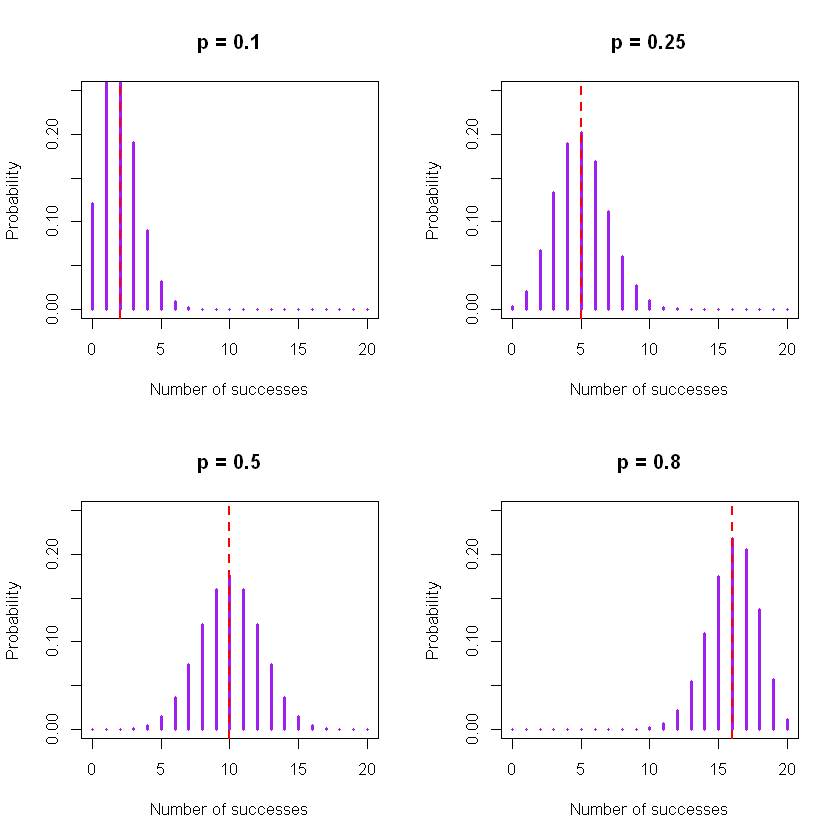

MEAN AND VARIANCE

Binomial(n=20, p=0.3):
Theoretical mean: 6 
Theoretical SD: 2.05 

Simulated mean: 5.99 
Simulated SD: 2.02 



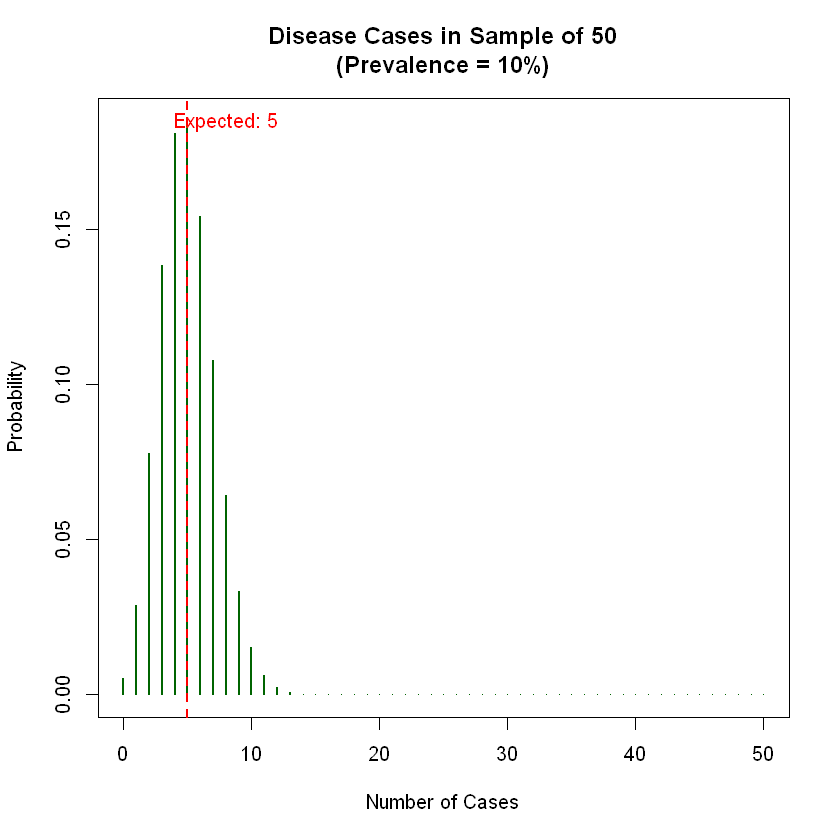


YOUR TURN: EXPLORE THE BINOMIAL


COMMON MISTAKES:

1. Confusing n (trials) with x (successes)
   - n is FIXED (parameter)
   - x is RANDOM (outcome)

2. Using binomial when trials aren't independent
   - Example: sampling WITHOUT replacement from small population
   - Use hypergeometric distribution instead

3. Using binomial when p isn't constant
   - Example: disease prevalence varies by age
   - Need more complex model

4. Forgetting P(X = a) = 1 - P(X = a-1)
   - NOT 1 - P(X = a)!

BINOMIAL <U+2192> NORMAL APPROXIMATION

Rule of thumb: Binomial looks approximately normal when:
n × p = 10  AND  n × (1-p) = 10

Binomial(100, 0.5):
n × p = 50  <U+2713>
n × (1-p) = 50  <U+2713>
Should look normal!



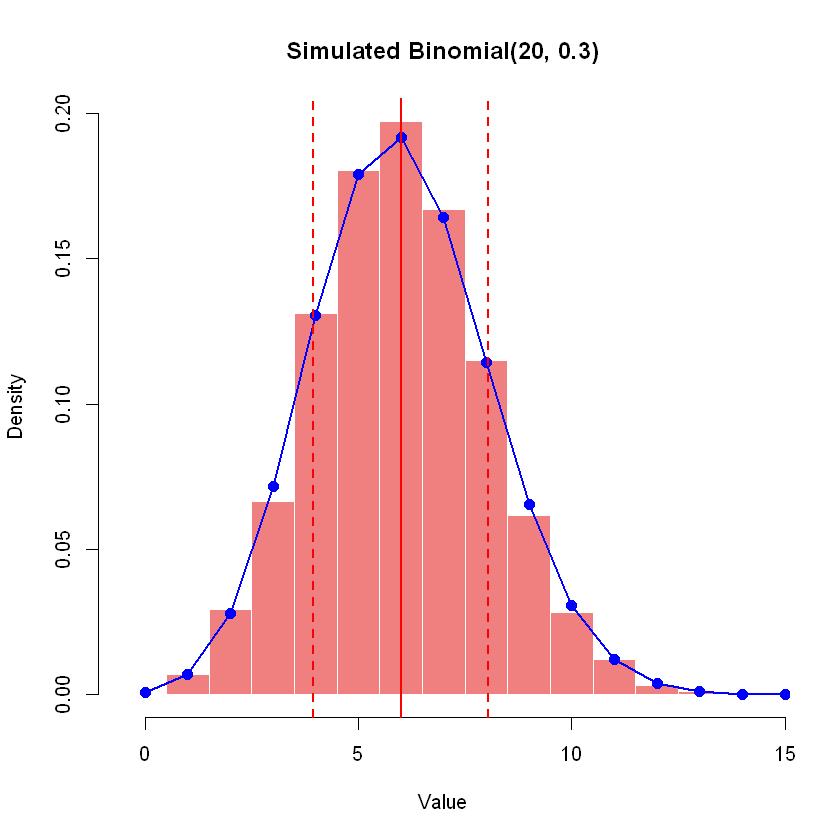

This approximation is useful for calculations when n is large!



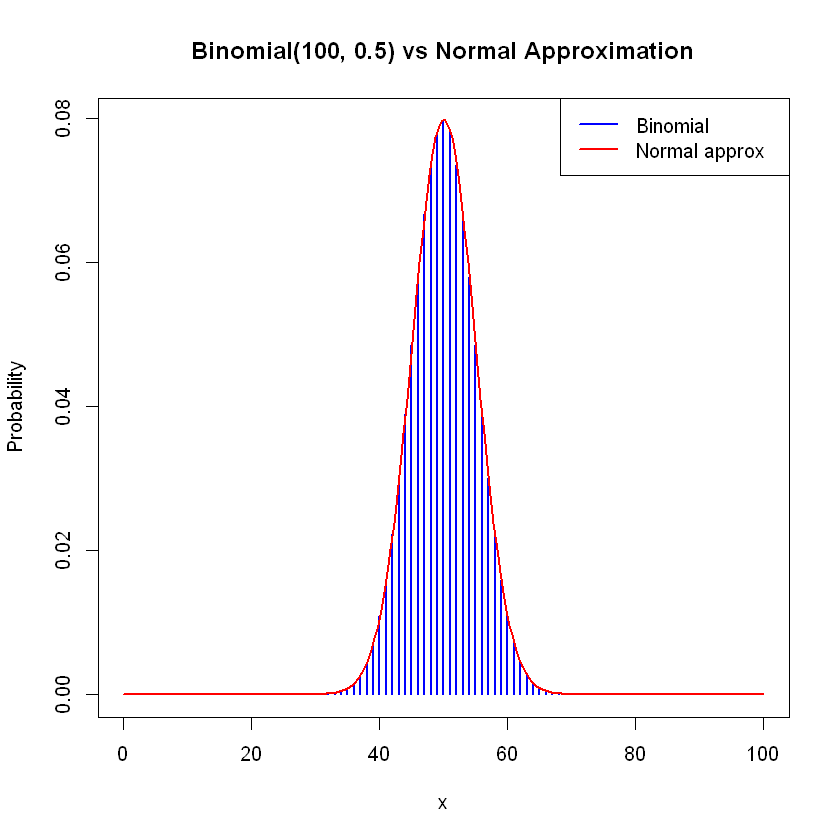

In [1]:
# =============================================================================
# Activity 6: Binomial Distribution Explorer
# =============================================================================
# 
# GOAL: Understand the binomial distribution through genetics examples
#
# CONCEPTS: Binomial distribution, fixed trials, success probability,
#           PMF (probability mass function)
#
# WHEN TO USE: Counting successes in a fixed number of independent trials
#              with constant probability
# =============================================================================

# -----------------------------------------------------------------------------
# PART 1: The Binomial Setup
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("THE BINOMIAL DISTRIBUTION\n")
cat("=================================================================\n\n")

cat("Use binomial when:\n")
cat("1. Fixed number of trials (n)\n")
cat("2. Each trial has two outcomes (success/failure)\n")
cat("3. Trials are independent\n")
cat("4. Probability of success (p) is constant\n\n")

cat("Biology Examples:\n")
cat("- Genotyping n plants (success = homozygous recessive)\n")
cat("- Testing n individuals for disease (success = positive)\n")
cat("- Sequencing n DNA bases (success = mutation present)\n")
cat("- n animals surviving treatment (success = survive)\n\n")


# -----------------------------------------------------------------------------
# PART 2: Genetics Example - Mendelian Ratios
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("EXAMPLE 1: MENDELIAN GENETICS\n")
cat("=================================================================\n\n")

# Cross two heterozygous plants (Aa x Aa)
# Offspring: 25% AA, 50% Aa, 25% aa
# Let's count homozygous recessive (aa)

n_plants <- 10  # Number of offspring
p_recessive <- 0.25  # Probability each is aa

cat("Scenario: Cross Aa x Aa, examine", n_plants, "offspring\n")
cat("Probability each is aa (recessive):", p_recessive, "\n\n")

# SIMULATION: Generate one experiment
set.seed(123)
one_experiment <- rbinom(n = 1, size = n_plants, prob = p_recessive)
cat("One experiment: Number of aa plants =", one_experiment, "\n\n")

# SIMULATION: Repeat experiment 1000 times
n_experiments <- 1000
results <- rbinom(n = n_experiments, size = n_plants, prob = p_recessive)

cat("1000 experiments simulated:\n")
cat("Mean number of aa plants:", round(mean(results), 2), "\n")
cat("Expected mean: n × p =", n_plants * p_recessive, "\n\n")

# Plot simulated distribution
hist(results, 
     breaks = seq(-0.5, max(results) + 0.5, by = 1),
     col = "lightblue",
     border = "white",
     main = paste("Simulated: Binomial(n=", n_plants, ", p=", p_recessive, ")", sep=""),
     xlab = "Number of aa plants (out of 10)",
     ylab = "Frequency",
     probability = TRUE)

# Overlay theoretical distribution
x_values <- 0:n_plants
theoretical_probs <- dbinom(x_values, size = n_plants, prob = p_recessive)
points(x_values, theoretical_probs, col = "red", pch = 16, cex = 1.5)
lines(x_values, theoretical_probs, col = "red", lwd = 2)

legend("topright", 
       c("Simulated", "Theoretical"),
       col = c("lightblue", "red"),
       lwd = c(10, 2))

cat("OBSERVATION: Simulation matches theory!\n\n")


# -----------------------------------------------------------------------------
# PART 3: Calculating Binomial Probabilities
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("CALCULATING PROBABILITIES\n")
cat("=================================================================\n\n")

# Three key functions in R:
# dbinom(x, size, prob) - P(X = x) - probability mass function
# pbinom(x, size, prob) - P(X ≤ x) - cumulative probability
# rbinom(n, size, prob) - generate n random values

cat("Question 1: What's P(exactly 3 aa plants)?\n")
p_exactly_3 <- dbinom(3, size = n_plants, prob = p_recessive)
cat("P(X = 3) =", round(p_exactly_3, 4), "\n")
cat("About", round(p_exactly_3 * 100, 1), "% chance\n\n")

# Verify with simulation
simulated_p <- mean(results == 3)
cat("From simulation:", round(simulated_p, 4), "\n\n")


cat("Question 2: What's P(at most 2 aa plants)?\n")
p_at_most_2 <- pbinom(2, size = n_plants, prob = p_recessive)
cat("P(X ≤ 2) =", round(p_at_most_2, 4), "\n\n")

# Verify
simulated_p <- mean(results <= 2)
cat("From simulation:", round(simulated_p, 4), "\n\n")


cat("Question 3: What's P(at least 4 aa plants)?\n")
# P(X ≥ 4) = 1 - P(X ≤ 3)
p_at_least_4 <- 1 - pbinom(3, size = n_plants, prob = p_recessive)
cat("P(X ≥ 4) =", round(p_at_least_4, 4), "\n\n")

# Verify
simulated_p <- mean(results >= 4)
cat("From simulation:", round(simulated_p, 4), "\n\n")


cat("Question 4: What's P(between 2 and 5, inclusive)?\n")
p_between <- pbinom(5, size = n_plants, prob = p_recessive) - 
             pbinom(1, size = n_plants, prob = p_recessive)
cat("P(2 ≤ X ≤ 5) =", round(p_between, 4), "\n\n")


# -----------------------------------------------------------------------------
# PART 4: Effect of Sample Size (n)
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("EFFECT OF SAMPLE SIZE\n")
cat("=================================================================\n\n")

# Compare different numbers of plants
par(mfrow = c(2, 2))

for (n in c(10, 20, 50, 100)) {
  x <- 0:n
  probs <- dbinom(x, size = n, prob = 0.25)
  
  plot(x, probs, 
       type = "h", lwd = 3, col = "blue",
       main = paste("n =", n),
       xlab = "Number of aa plants",
       ylab = "Probability",
       ylim = c(0, max(0.2, max(probs))))
  
  # Add expected value
  expected <- n * 0.25
  abline(v = expected, col = "red", lwd = 2, lty = 2)
}

par(mfrow = c(1, 1))

cat("OBSERVATIONS:\n")
cat("1. As n increases, distribution spreads out (more possible values)\n")
cat("2. As n increases, distribution becomes more bell-shaped (normal!)\n")
cat("3. Peak stays at expected value: E[X] = n × p\n\n")


# -----------------------------------------------------------------------------
# PART 5: Effect of Probability (p)
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("EFFECT OF SUCCESS PROBABILITY\n")
cat("=================================================================\n\n")

# Fix n=20, vary p
par(mfrow = c(2, 2))

for (p in c(0.1, 0.25, 0.5, 0.8)) {
  x <- 0:20
  probs <- dbinom(x, size = 20, prob = p)
  
  plot(x, probs, 
       type = "h", lwd = 3, col = "purple",
       main = paste("p =", p),
       xlab = "Number of successes",
       ylab = "Probability",
       ylim = c(0, 0.25))
  
  abline(v = 20 * p, col = "red", lwd = 2, lty = 2)
}

par(mfrow = c(1, 1))

cat("OBSERVATIONS:\n")
cat("1. p = 0.5: Symmetric distribution\n")
cat("2. p < 0.5: Right-skewed (tail to the right)\n")
cat("3. p > 0.5: Left-skewed (tail to the left)\n")
cat("4. Peak moves with p: E[X] = n × p\n\n")


# -----------------------------------------------------------------------------
# PART 6: Real Biology Example - Disease Screening
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("BIOLOGY APPLICATION: DISEASE SCREENING\n")
cat("=================================================================\n\n")

# Screen 50 individuals for a genetic disease
# Prevalence: 10% (p = 0.1)
n_tested <- 50
disease_prevalence <- 0.1

cat("Scenario: Screen", n_tested, "people for a disease\n")
cat("Disease prevalence:", disease_prevalence * 100, "%\n\n")

# Expected number of cases
expected_cases <- n_tested * disease_prevalence
cat("Expected number of cases:", expected_cases, "\n\n")

# Probability of finding exactly 5 cases
p_exactly_5 <- dbinom(5, size = n_tested, prob = disease_prevalence)
cat("P(exactly 5 cases) =", round(p_exactly_5, 4), "\n\n")

# Probability of finding 0 cases (all healthy)
p_zero <- dbinom(0, size = n_tested, prob = disease_prevalence)
cat("P(0 cases - all healthy) =", round(p_zero, 4), "\n")
cat("Very unlikely (only", round(p_zero * 100, 2), "% chance)\n\n")

# Probability of at least 10 cases
p_at_least_10 <- 1 - pbinom(9, size = n_tested, prob = disease_prevalence)
cat("P(at least 10 cases) =", round(p_at_least_10, 4), "\n\n")

# Plot the full distribution
x <- 0:n_tested
probs <- dbinom(x, size = n_tested, prob = disease_prevalence)

plot(x, probs,
     type = "h", lwd = 2, col = "darkgreen",
     main = "Disease Cases in Sample of 50\n(Prevalence = 10%)",
     xlab = "Number of Cases",
     ylab = "Probability")
abline(v = expected_cases, col = "red", lwd = 2, lty = 2)
text(expected_cases + 3, max(probs), 
     paste("Expected:", expected_cases), col = "red")


# -----------------------------------------------------------------------------
# PART 7: Mean and Variance of Binomial
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("MEAN AND VARIANCE\n")
cat("=================================================================\n\n")

# For Binomial(n, p):
# Mean: μ = n × p
# Variance: σ² = n × p × (1-p)
# SD: σ = sqrt(n × p × (1-p))

n <- 20
p <- 0.3

theoretical_mean <- n * p
theoretical_variance <- n * p * (1 - p)
theoretical_sd <- sqrt(theoretical_variance)

cat("Binomial(n=", n, ", p=", p, "):\n", sep="")
cat("Theoretical mean:", theoretical_mean, "\n")
cat("Theoretical SD:", round(theoretical_sd, 2), "\n\n")

# Verify by simulation
simulated_data <- rbinom(10000, size = n, prob = p)
cat("Simulated mean:", round(mean(simulated_data), 2), "\n")
cat("Simulated SD:", round(sd(simulated_data), 2), "\n\n")

# Visualize
hist(simulated_data,
     breaks = seq(-0.5, max(simulated_data) + 0.5, by = 1),
     col = "lightcoral",
     border = "white",
     main = "Simulated Binomial(20, 0.3)",
     xlab = "Value",
     probability = TRUE)

# Add theoretical
x_vals <- 0:n
theoretical <- dbinom(x_vals, size = n, prob = p)
points(x_vals, theoretical, col = "blue", pch = 16, cex = 1.2)
lines(x_vals, theoretical, col = "blue", lwd = 2)

# Mark mean and ±1 SD
abline(v = theoretical_mean, col = "red", lwd = 2)
abline(v = theoretical_mean - theoretical_sd, col = "red", lwd = 2, lty = 2)
abline(v = theoretical_mean + theoretical_sd, col = "red", lwd = 2, lty = 2)


# -----------------------------------------------------------------------------
# PART 8: YOUR TURN - Explore!
# -----------------------------------------------------------------------------

cat("\n=================================================================\n")
cat("YOUR TURN: EXPLORE THE BINOMIAL\n")
cat("=================================================================\n\n")

# TODO 1: Test cross
# Cross Aa x aa (test cross)
# What proportion of offspring will be Aa? (Answer: 50%)
# Simulate 20 offspring, repeat 1000 times
# What's P(exactly 10 are Aa)?
# What's P(at least 12 are Aa)?


# TODO 2: Rare disease
# Disease prevalence: 1% (p = 0.01)
# Test 100 people
# What's expected number of cases?
# What's P(0 cases)?
# What's P(more than 3 cases)?


# TODO 3: Drug efficacy
# Drug works for 70% of patients
# Treat 15 patients
# What's P(drug works for all 15)?
# What's P(works for at least 10)?
# Plot the distribution


# TODO 4: Compare binomials
# Plot Binomial(20, 0.5) and Binomial(20, 0.8) on same axes
# How do they differ?


# TODO 5: Find required sample size
# You want at least 90% chance of finding at least one case
# Disease prevalence: 5%
# How many people do you need to test?
# Hint: P(X ≥ 1) = 1 - P(X = 0) = 1 - (0.95)^n
# Try different values of n until P(X ≥ 1) > 0.9


# -----------------------------------------------------------------------------
# PART 9: Common Mistakes and Tips
# -----------------------------------------------------------------------------

cat("\n=================================================================\n")
cat("COMMON MISTAKES:\n")
cat("=================================================================\n\n")

cat("1. Confusing n (trials) with x (successes)\n")
cat("   - n is FIXED (parameter)\n")
cat("   - x is RANDOM (outcome)\n\n")

cat("2. Using binomial when trials aren't independent\n")
cat("   - Example: sampling WITHOUT replacement from small population\n")
cat("   - Use hypergeometric distribution instead\n\n")

cat("3. Using binomial when p isn't constant\n")
cat("   - Example: disease prevalence varies by age\n")
cat("   - Need more complex model\n\n")

cat("4. Forgetting P(X ≥ a) = 1 - P(X ≤ a-1)\n")
cat("   - NOT 1 - P(X ≤ a)!\n\n")


# -----------------------------------------------------------------------------
# PART 10: When Does Binomial Approximate Normal?
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("BINOMIAL → NORMAL APPROXIMATION\n")
cat("=================================================================\n\n")

cat("Rule of thumb: Binomial looks approximately normal when:\n")
cat("n × p ≥ 10  AND  n × (1-p) ≥ 10\n\n")

# Example: Compare Binomial(100, 0.5) to Normal
n <- 100
p <- 0.5

cat("Binomial(100, 0.5):\n")
cat("n × p =", n * p, " ✓\n")
cat("n × (1-p) =", n * (1-p), " ✓\n")
cat("Should look normal!\n\n")

x <- 0:n
binom_probs <- dbinom(x, size = n, prob = p)

# Plot binomial
plot(x, binom_probs,
     type = "h", lwd = 2, col = "blue",
     main = "Binomial(100, 0.5) vs Normal Approximation",
     xlab = "x",
     ylab = "Probability")

# Overlay normal approximation
mean_val <- n * p
sd_val <- sqrt(n * p * (1-p))
x_smooth <- seq(0, n, length.out = 200)
normal_approx <- dnorm(x_smooth, mean = mean_val, sd = sd_val)
lines(x_smooth, normal_approx, col = "red", lwd = 2)

legend("topright",
       c("Binomial", "Normal approx"),
       col = c("blue", "red"),
       lwd = 2)

cat("This approximation is useful for calculations when n is large!\n\n")


# -----------------------------------------------------------------------------
# DISCUSSION QUESTIONS
# -----------------------------------------------------------------------------
#
# 1. Why is the binomial distribution discrete (jumps) rather than
#    continuous (smooth)?
#
# 2. In the genetics example, we used p=0.25 for aa. How would the
#    distribution change if we were counting Aa instead (p=0.5)?
#
# 3. When might you use binomial in your own biology research?
#    Give a specific example.
#
# 4. The binomial assumes independence. When might this assumption
#    be violated in biology? (Hint: think about contagious diseases,
#    or sampling from small populations)
#
# 5. Why does the binomial distribution become more bell-shaped
#    (normal-like) as n increases?
#
# 6. If you flip a coin 100 times, is the outcome "exactly 50 heads"
#    the most likely? Check with dbinom()!
#
# =============================================================================